<a href="https://colab.research.google.com/github/pujitharanigelam/IBM/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the gdown library
!pip install gdown

# The Google Drive file ID is extracted from the URL
file_id = '11KyCBtciO18k4WUJ3Nh8SBwd8b7OlOqr'
output = 'customer_segmentation.csv'

# Download the file
import gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11KyCBtciO18k4WUJ3Nh8SBwd8b7OlOqr
To: /content/customer_segmentation.csv
100%|██████████| 2.63k/2.63k [00:00<00:00, 7.40MB/s]


'customer_segmentation.csv'

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

# Display the first few rows to understand the data
print("Initial Data:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Description:")
print(data.describe())

Initial Data:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   56                  76                       1
1           2   69                  65                      16
2           3   46                  73                      61
3           4   32                 132                      64
4           5   60                 110                      63

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None

Data Description:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.00000          200.000000   

In [4]:
# --- Data Preprocessing ---
# Select the features for clustering: Annual Income and Spending Score
# This helps simplify the project for educational purposes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# It's important to scale the data so that all features contribute equally to the clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nScaled Data:")
print(X_scaled[:5])


Scaled Data:
[[-0.29065344 -1.67057641]
 [-0.56866977 -1.15628916]
 [-0.36647608  0.38657258]
 [ 1.12470244  0.48943003]
 [ 0.56866977  0.45514421]]


In [5]:
# --- Finding the optimal number of clusters (K) using the Elbow Method ---
# The Elbow Method helps us choose the best 'k' for K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # Inertia is the sum of squared distances of samples to their closest cluster center.



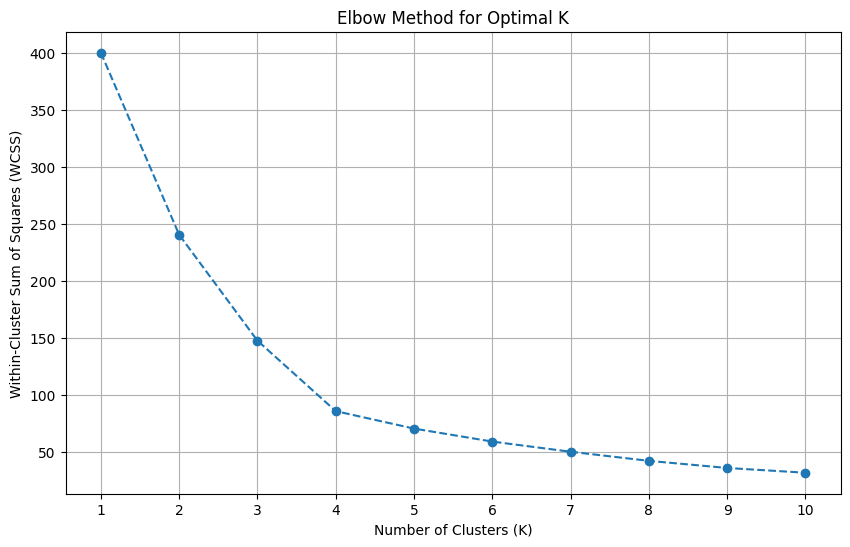

In [6]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [7]:
# --- Apply K-Means with the optimal number of clusters ---
# Based on the plot, we will choose a value for K where the WCSS starts to decrease linearly
# Let's assume K=5 is the optimal number of clusters from the elbow plot
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Print the number of customers in each cluster
print("\nNumber of customers in each cluster:")
print(data['Cluster'].value_counts())


Number of customers in each cluster:
Cluster
1    51
4    45
2    41
3    32
0    31
Name: count, dtype: int64


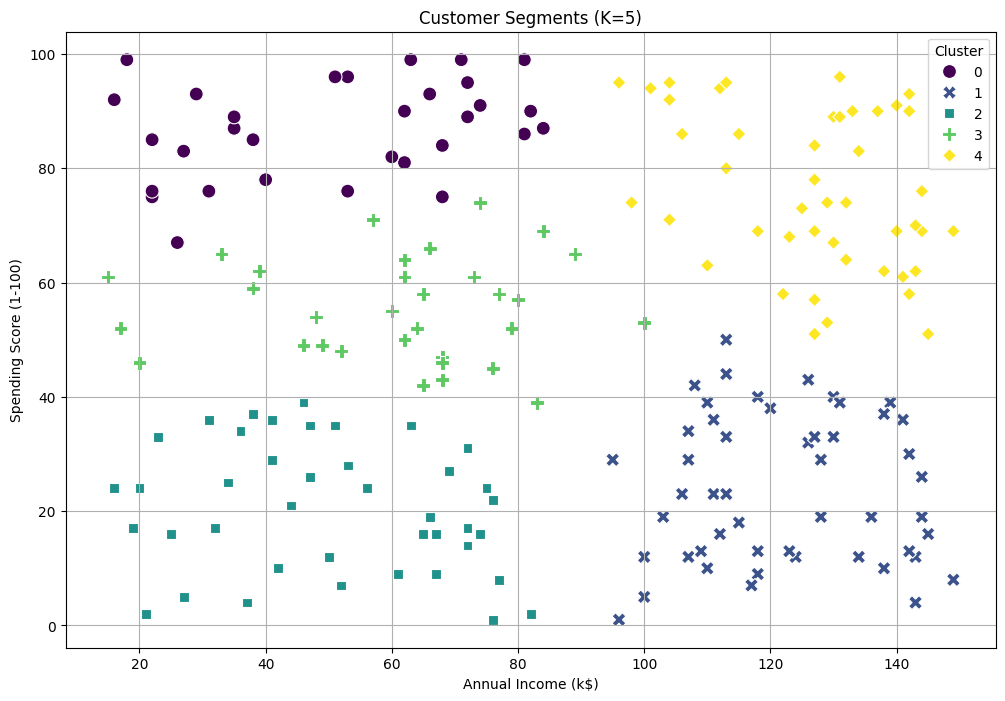

In [8]:
# --- Visualization of the Clusters ---
# Visualize the clusters using a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100, style='Cluster')
plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [9]:
# Analyze the characteristics of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
cluster_df['Cluster'] = range(optimal_k)

print("\nCluster Profiles:")
print(cluster_df)


Cluster Profiles:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0           51.096774               86.870968        0
1          121.843137               23.823529        1
2           50.317073               20.536585        2
3           60.593750               55.406250        3
4          126.666667               76.044444        4
